### 14-9- Experimentation guided example


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [4]:
PATH = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/1.4.11_experimentation_guided_example/experiment_data_2_wks.csv'
experiment_data = pd.read_csv(PATH)

In [6]:
experiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33613 entries, 0 to 33612
Data columns (total 4 columns):
treatment_date    33613 non-null object
test              33613 non-null int64
is_signed_up      33613 non-null int64
signup_date       4910 non-null object
dtypes: int64(2), object(2)
memory usage: 1.0+ MB


In [3]:
experiment_data.head(10)

,treatment_date,test,is_signed_up,signup_date
0,2016-04-01,0,0,NaN
1,2016-04-01,0,0,NaN
2,2016-04-01,0,0,NaN
3,2016-04-01,0,0,NaN
4,2016-04-01,0,0,NaN
5,2016-04-01,0,0,NaN
6,2016-04-01,1,1,2016-04-02
7,2016-04-01,0,0,NaN
8,2016-04-01,0,0,NaN
9,2016-04-01,0,0,NaN


In [57]:
# How large is each group?
# controlled group: (test==0) 30241
# test group: (test == 1) 3372

controlled_group = len(experiment_data[experiment_data.test == 0])
test_group = len(experiment_data[experiment_data.test == 1])

##### in the answer they have test proportion - what do we need this? 
#### what does this number mean?

print('test proportion:', experiment_data.test.mean())

# What is the signup rate of test and control?
# controll: 0.14708508316523924
# test:0.13701067615658363

control_signup_rate = experiment_data[experiment_data.test == 0].is_signed_up.mean()
test_signup_rate = experiment_data[experiment_data.test == 1].is_signed_up.mean()

test_signup_rate


# Is the experiment already significant?
# check to see if the test and control groups are already significant? do this by doing a t-test and looking at the p-value
##### how can the t-test tell us if the experiment is significant???
### what is our null hypothesis here?

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

stats.ttest_ind(experiment_data[experiment_data.test == 0].is_signed_up,
                experiment_data[experiment_data.test == 1].is_signed_up)


#### if I switch the control and test, I get -ve value - does it matter which comes first?

test proportion: 0.10031832921786214


Ttest_indResult(statistic=1.5711354292574262, pvalue=0.11616060761145311)

* the answer says that the groups are not significantly different? I don't understand why from the restults. I see that the p-value is > 0.05. So if 

null hypoethesis: groups are not signicantly different and we reject the null if p<0.05. Since p is not < 0.05, therefore, we reject the null? is that why???

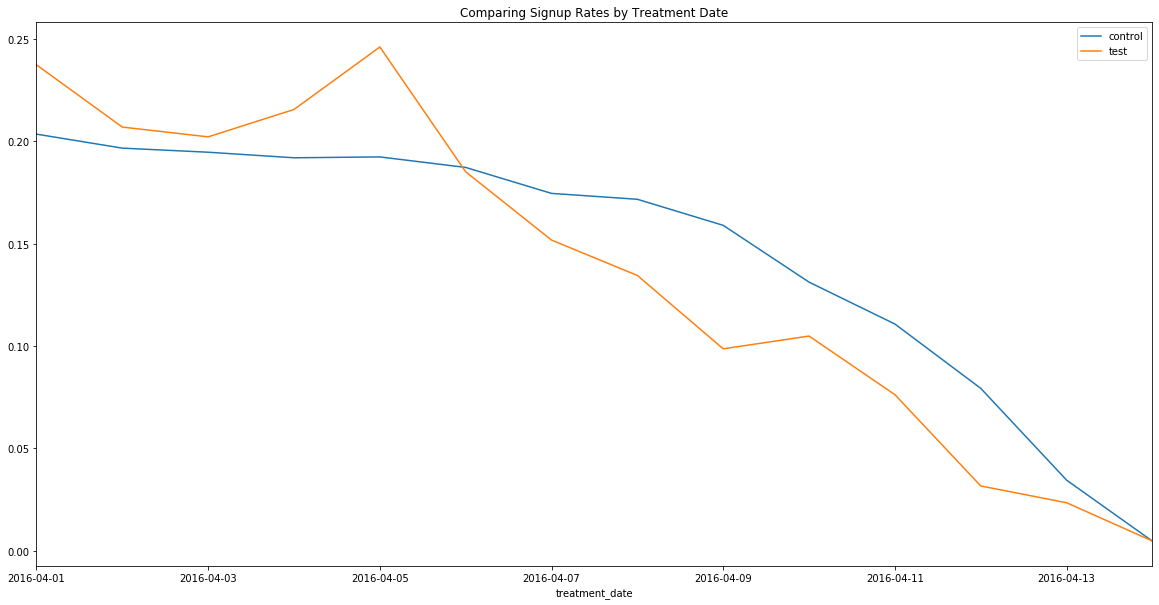

In [56]:
# control -> 0, test -> 1
fig = experiment_data[experiment_data.test==0][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot()
experiment_data[experiment_data.test==1][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot(ax=fig,figsize=(20, 10))
plt.legend(['control','test'])
plt.title('Comparing Signup Rates by Treatment Date')
plt.show()



* Final Data after about 4 weeks of experiement

In [15]:
# load the final data
PATH_final = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/1.4.11_experimentation_guided_example/experiment_data_final.csv'
experiment_final_data = pd.read_csv(PATH_final)


In [26]:
# How large is each group?
# control (test == 0) : 46867
# test group (test == 1): 19861

control_group_final = experiment_final_data[experiment_final_data.test == 0]
test_group_final = experiment_final_data[experiment_final_data.test == 1]

controlled_group_final_size = len(control_group_final)
test_group_final_size = len(test_group_final)

print(controlled_group_final_size)
print(test_group_final_size)

46867
19861


In [28]:
# What is the signup rate of test and control?
# COntrol: 0.19937269293959503
# test: 0.2421328231206888

control_signup_rate = control_group_final['is_signed_up'].mean()
test_signup_rate = test_group_final['is_signed_up'].mean()

print(control_signup_rate)
print(test_signup_rate)

0.19937269293959503
0.2421328231206888


In [29]:
# Is the experiment already significant?
stats.ttest_ind(control_group_final['is_signed_up'],test_group_final['is_signed_up'])

##### how do we tell if the experiement is significant? by p-value again? 
#what does the -12.3 t-value means?

Ttest_indResult(statistic=-12.368130184147793, pvalue=4.248167714911685e-35)

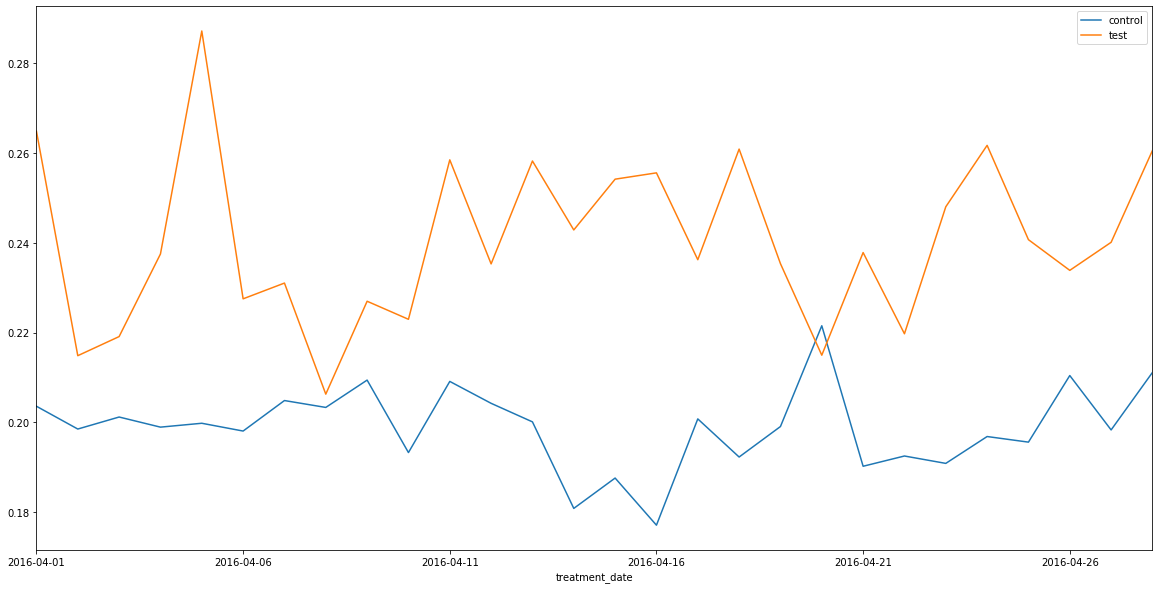

In [55]:
#### create some visualization to see if this what we understand from this data

# let's plot signup graphs for controlled and test groups

#graph = control_group_final['treatment_date','is_signed_up'].groupby('treatment_date').mean()

graph_control = control_group_final[
        ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot()

test_group_final[
        ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot(ax=graph_control,figsize=(20, 10))

#graph = control_group_final.groupby('treatment_date').mean()
#graph_control.plot(ax=graph_test)
#graph_control.plot()
#graph_test.plot()
plt.legend(['control','test'])
plt.show()


In [59]:
# t-test on treatment date which is the date the email sent

print('t-test results by date')

for date in experiment_final_data.treatment_date.unique():
    dated_data_final = experiment_final_data[experiment_final_data.treatment_date == date]
    print(stats.ttest_ind(dated_data_final[dated_data_final.test == 0].is_signed_up,
                          dated_data_final[dated_data_final.test == 1].is_signed_up))



t-test results by date
Ttest_indResult(statistic=-2.109324797220635, pvalue=0.03503362670270496)
Ttest_indResult(statistic=-0.6192500966292611, pvalue=0.5358074588708265)
Ttest_indResult(statistic=-0.5679550900332947, pvalue=0.5701279663761336)
Ttest_indResult(statistic=-1.6188051066317655, pvalue=0.1055969402778888)
Ttest_indResult(statistic=-2.8685447266859416, pvalue=0.004164832495654052)
Ttest_indResult(statistic=-0.96535203316303, pvalue=0.33447754270147856)
Ttest_indResult(statistic=-1.0646969669150483, pvalue=0.2870993136921545)
Ttest_indResult(statistic=-0.10372657556539404, pvalue=0.9173962881267106)
Ttest_indResult(statistic=-0.7109875532022712, pvalue=0.4771475732556426)
Ttest_indResult(statistic=-1.234910031428132, pvalue=0.2169634842483128)
Ttest_indResult(statistic=-1.7524585316828551, pvalue=0.07982714269646307)
Ttest_indResult(statistic=-1.0772576129054874, pvalue=0.2814883969553773)
Ttest_indResult(statistic=-1.9956610823589083, pvalue=0.046093372990527584)
Ttest_indRe

In [ ]:
# what are the conclusions from this experiment?

The new email seems to be a significant improvement on the old email, but at a slower rate of conversion. So as long as BlueBird isn't desperate for signups in the next few days, the change seems worth it. In this case, however, it would also be worth working with the advertising and engineering teams to see if you could figure out why conversation was slower for the test email. That could inform whether the effect might change over time.

Specifically, the distribution of the mean is normal, meaning we could use something called a two sample proportional z-test. We haven't covered this test yet, but you can read about it - https://onlinecourses.science.psu.edu/stat414/node/268